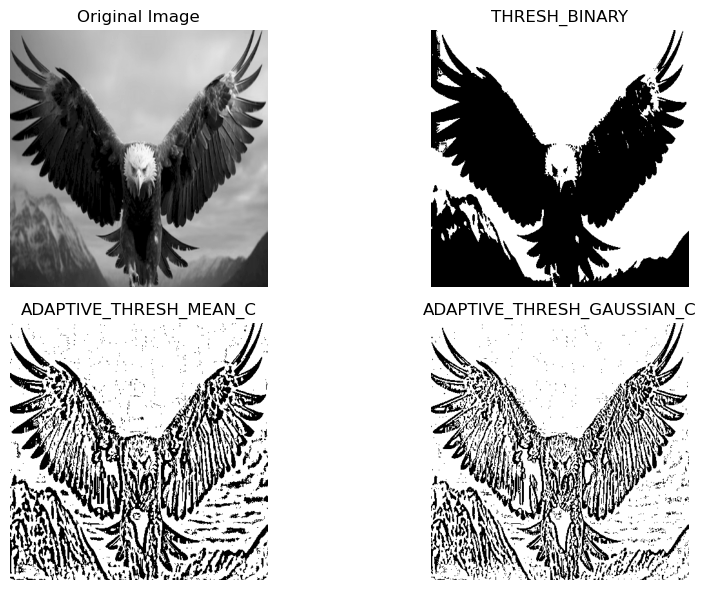

'\nThresholding Methods:\n\nThe code applies three different thresholding methods to the image:\n-Simple Thresholding (THRESH_BINARY):\n Converts pixel values greater than 127 to 255 (white) and others to 0 (black).\n-Adaptive Mean Thresholding (ADAPTIVE_THRESH_MEAN_C):\n Computes the threshold value for each pixel based on the mean of the neighborhood (using an 11x11 window).\n-Adaptive Gaussian Thresholding (ADAPTIVE_THRESH_GAUSSIAN_C):\n Computes the threshold value using a weighted sum of the neighborhood values (using an 11x11 window) with a Gaussian window.\n'

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png", 0)
img = cv2.resize(img, (400, 400))

# Apply thresholding methods
_, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)  # Simple thresholding
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)  # Adaptive mean thresholding
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)  # Adaptive Gaussian thresholding

# Display images using matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(th1, cmap='gray')
plt.title("THRESH_BINARY")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(th2, cmap='gray')
plt.title("ADAPTIVE_THRESH_MEAN_C")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(th3, cmap='gray')
plt.title("ADAPTIVE_THRESH_GAUSSIAN_C")
plt.axis('off')

plt.tight_layout()
plt.show()
"""
Thresholding Methods:

The code applies three different thresholding methods to the image:
-Simple Thresholding (THRESH_BINARY):
 Converts pixel values greater than 127 to 255 (white) and others to 0 (black).
-Adaptive Mean Thresholding (ADAPTIVE_THRESH_MEAN_C):
 Computes the threshold value for each pixel based on the mean of the neighborhood (using an 11x11 window).
-Adaptive Gaussian Thresholding (ADAPTIVE_THRESH_GAUSSIAN_C):
 Computes the threshold value using a weighted sum of the neighborhood values (using an 11x11 window) with a Gaussian window.
"""

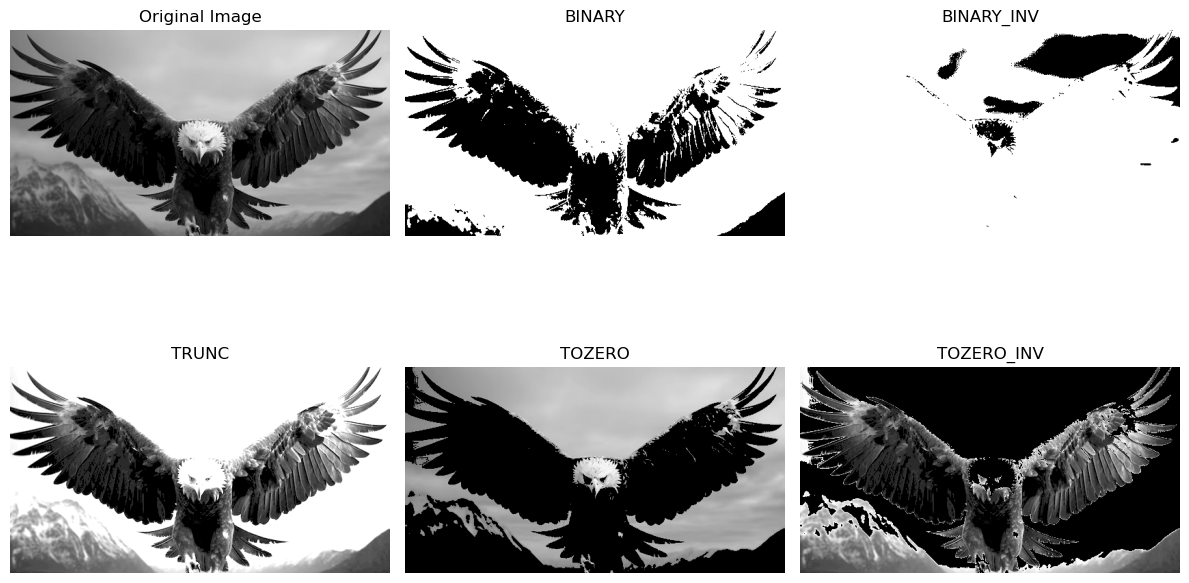

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png", 0)

# Apply different thresholding methods
_, th1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
_, th3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, th4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, th5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# Set up titles and images for display
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

# Display images using Matplotlib
plt.figure(figsize=(12, 8))

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

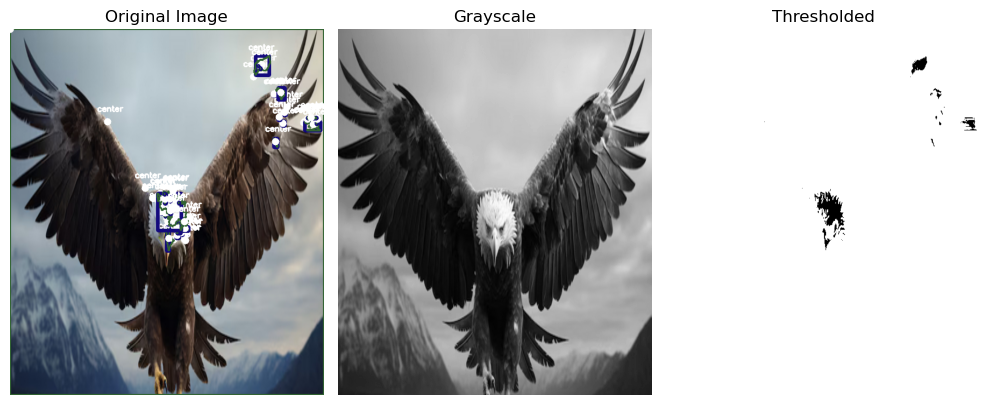

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\SS_007.png")
img = cv2.resize(img, (600, 700))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, thresh = cv2.threshold(img1, 220, 255, cv2.THRESH_BINARY_INV)

# Find contours
cnts, hier = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create an empty list to store contour areas
area1 = []

# Loop over the contours
for c in cnts:
    # Compute the center of the contour
    M = cv2.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    # Find the area of the contour
    area = cv2.contourArea(c)
    area1.append(area)
    
    if area < 10000:
        # Contour approximation
        epsilon = 0.1 * cv2.arcLength(c, True)
        data = cv2.approxPolyDP(c, epsilon, True)
        
        # Convex hull
        hull = cv2.convexHull(data)
        
        # Draw bounding rectangle
        x, y, w, h = cv2.boundingRect(hull)
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (125, 10, 20), 5)
 
    # Draw the contour and center of the shape on the image
    cv2.drawContours(img, [c], -1, (50, 100, 50), 2)
    cv2.circle(img, (cX, cY), 7, (255, 255, 255), -1)
    cv2.putText(img, "center", (cX - 20, cY - 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Display images using Matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img1, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(thresh, cmap="gray")
plt.title("Thresholded")
plt.axis("off")

plt.tight_layout()
plt.show()

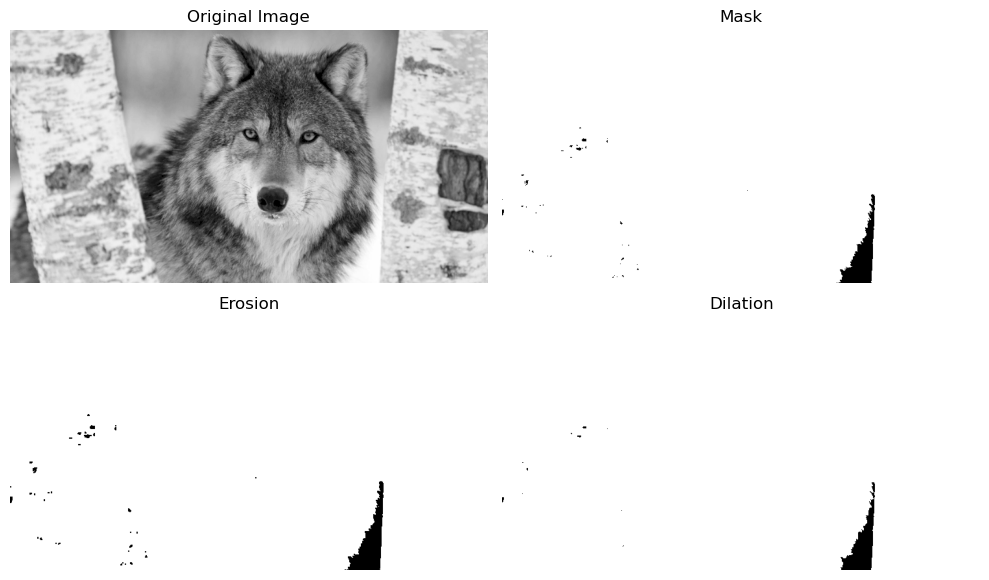

In [4]:
"""thresholding, erosion, and dilation on an image"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread(r"C:\Users\BhavyeBhasin\Downloads\wolfss.png", 0)

# Apply thresholding to create a mask
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

# Define a 2x2 kernel
kernel = np.ones((2, 2), np.uint8)

# Erosion
e = cv2.erode(mask, kernel)

# Dilation
d = cv2.dilate(mask, kernel)

# Display images using Matplotlib
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Mask")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(e, cmap='gray')
plt.title("Erosion")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(d, cmap='gray')
plt.title("Dilation")
plt.axis('off')

plt.tight_layout()
plt.show()
